<a href="https://colab.research.google.com/github/sofiane1010/SIC_test/blob/main/test_6/problem_0503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quiz #0503

### "Data Augmentation"

#### Answer the following questions by providing Python code:
#### Objectives:
- Code the helper functions.
- Optimize and test a predictive model of your choice.
- Carry out data aumentation in order to improve the predictive accuracy when the given training data is small.

In [86]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from scipy.ndimage.interpolation import rotate
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the original data can be found [here](http://yann.lecun.com/exdb/mnist/).

- The data we will be using is a small subset of the original data with only 100 observations.
- Each observation is the "flattened" version of a image.
- The first column corresponds to the label (Y).
- The image size is 28x28.

In [121]:
# Read the training and testing data separately.
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')

# Scale and split the data set into X and Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

1). The helper function 'show_data()' visualizes each given observation.

In [88]:
def show_data(X, Y, n, angle=0):
    image_matrix = X[n,:].reshape((28,28))
    image_matrix = rotate(image_matrix, angle, cval=0.01, reshape=False)
    imax = image_matrix.max()
    imin = image_matrix.min()
    image_matrix = ((image_matrix-imin)/(imax-imin))*0.99+0.01
    plt.imshow(image_matrix, cmap='Greys',interpolation='None')
    print(Y[n])

3


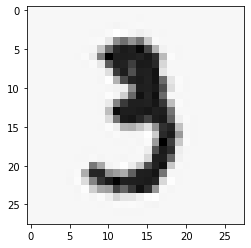

In [89]:
# Example 1.
show_data(X_train, Y_train,10,+10)

3


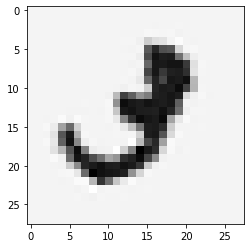

In [90]:
# Example 2.
show_data(X_train, Y_train,10,-30)

1


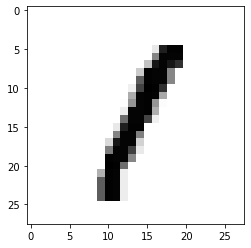

In [91]:
# Example 3.
show_data(X_train, Y_train,77,0)

2). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s).
- Calculate the accuracy.
- Is the accuracy high enough?

In [122]:
# <Your code goes in here>
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(Y_test, y_pred))

0.67


the accuracy is not that good


3). Code the helper function 'rotate_data()' that rotates each given observation by an angle. HINT: use scipy.ndimage.interpolation().

In [94]:
# <Your code goes in here>
def rotate_data(x, angle):
  image_matrix = x.reshape((28,28))
  image_matrix = rotate(image_matrix, angle, cval=0.01, reshape=False)
  return image_matrix.reshape(28*28)

4). Augment the training dataset.
- Increase the size of the training dataset by introducing slight rotations (clockwise and counterclockwise).
- Use the 'rotate_data()' function defined in the previous step.
- No need to augment the testing dataset.
- Target approximately five fold aumentation.

In [123]:
rotations = [10,-10,20,-20,30,-30,40,-40,50,-50]
for _ in range(3):
  for index, img in enumerate(X_train):
    X_train = np.append(X_train, [rotate_data(img, rotations[np.random.randint(10)])], axis=0)
    Y_train = np.append(Y_train, Y_train[index])

In [124]:
X_train.shape, Y_train.shape

((800, 784), (800,))

5). Redo the predictive analysis with the augmented training dataset.

- Use the same algorithm as in the step 2).
- Calculate the accuracy.
- Has the accuracy gone up?

In [162]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(Y_test, y_pred))

0.75


The accuracy is slightly better.